In [58]:
import json
import pickle
import os
import zipfile

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from glob import glob
from shutil import copyfile

pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")

In [59]:
#### Settings
### Learning Rate for CNN = 0.01, no learning rate decay

In [60]:
os.chdir("/home/bahy/research/icl-prelab-assignment/")

In [61]:
!pwd

/home/bahy/research/icl-prelab-assignment


In [62]:
datas = []
for file_name in glob("logs_q3/*.txt"):
    print(file_name)
    file = open(file_name, "rb")
    for data in file.readlines():
        if len(data) < 10: # Ignoring blank space/not useful information
            continue
        dict_data = eval(data)
        dict_data['setting'] = file_name.split("/")[1].split("-")[0]
        dict_data['E'] = file_name.split("/")[1].split("-")[2].replace("E", "")
        dict_data['model'] = file_name.split("/")[1].split("-")[-1].split(".")[0]
 
        datas.append(dict_data)
        
datas = pd.DataFrame(datas)

logs_q3/IID-B600-E1-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B10-E1-C0.1-MNIST-CNN.txt
logs_q3/IID-B600-E20-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B50-E1-C0.1-MNIST-CNN.txt
logs_q3/IID-B10-E20-C0.1-MNIST-CNN.txt
logs_q3/IID-B50-E1-C0.1-MNIST-CNN.txt
logs_q3/IID-B50-E20-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B50-E20-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B600-E20-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B600-E1-C0.1-MNIST-CNN.txt
logs_q3/IID-B10-E1-C0.1-MNIST-CNN.txt
logs_q3/NONIID-B10-E20-C0.1-MNIST-CNN.txt


In [63]:
datas.head()

,C,B,comm_round,train_acc,test_acc,train_loss,test_loss,setting,E,model
0,0.1,600,1,0.0985,0.1023,2.2986,2.2978,IID,1,CNN
1,0.1,600,2,0.1060,0.1105,2.2952,2.2944,IID,1,CNN
2,0.1,600,3,0.1142,0.1198,2.2919,2.2911,IID,1,CNN
3,0.1,600,4,0.1220,0.1281,2.2887,2.2877,IID,1,CNN
4,0.1,600,5,0.1294,0.1330,2.2854,2.2844,IID,1,CNN


In [64]:
# Sort the data
ROUNDING_DIGIT = 4

df_metrics = datas.sort_values(by=['setting', 'B', 'E', 'comm_round']).reset_index(drop=True)
df_metrics = df_metrics[['setting', 'B', 'E', 'C', 'comm_round', 'train_acc', 'test_acc', 'train_loss', 'test_loss', 'model']]
df_metrics['train_acc'] = df_metrics['train_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_acc'] = df_metrics['test_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['train_loss'] = df_metrics['train_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_loss'] = df_metrics['test_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics.head()

,setting,B,E,C,comm_round,train_acc,test_acc,train_loss,test_loss,model
0,IID,10,1,0.1,1,0.6006,0.6148,2.0736,2.0677,CNN
1,IID,10,1,0.1,2,0.7659,0.7795,1.3630,1.3437,CNN
2,IID,10,1,0.1,3,0.8295,0.8434,0.6980,0.6723,CNN
3,IID,10,1,0.1,4,0.8757,0.8815,0.4930,0.4735,CNN
4,IID,10,1,0.1,5,0.8888,0.8976,0.4061,0.3861,CNN


In [65]:
df_metrics.tail()

,setting,B,E,C,comm_round,train_acc,test_acc,train_loss,test_loss,model
11995,NONIID,600,20,0.1,996,0.8641,0.8676,0.3924,0.3817,CNN
11996,NONIID,600,20,0.1,997,0.8988,0.8990,0.2788,0.2746,CNN
11997,NONIID,600,20,0.1,998,0.9220,0.9256,0.2369,0.2273,CNN
11998,NONIID,600,20,0.1,999,0.9468,0.9502,0.1773,0.1652,CNN
11999,NONIID,600,20,0.1,1000,0.9456,0.9477,0.1773,0.1676,CNN


In [66]:
df_metrics['label'] = df_metrics['B'].apply(lambda x: "B=" + str(x)) + " " +\
                        df_metrics['E'].apply(lambda x: "E=" + str(x))
df_metrics.head()

,setting,B,E,C,comm_round,train_acc,test_acc,train_loss,test_loss,model,label
0,IID,10,1,0.1,1,0.6006,0.6148,2.0736,2.0677,CNN,B=10 E=1
1,IID,10,1,0.1,2,0.7659,0.7795,1.3630,1.3437,CNN,B=10 E=1
2,IID,10,1,0.1,3,0.8295,0.8434,0.6980,0.6723,CNN,B=10 E=1
3,IID,10,1,0.1,4,0.8757,0.8815,0.4930,0.4735,CNN,B=10 E=1
4,IID,10,1,0.1,5,0.8888,0.8976,0.4061,0.3861,CNN,B=10 E=1


In [67]:
df_metrics.groupby(["setting", "label"]).size()

setting  label     
IID      B=10 E=1      1000
         B=10 E=20     1000
         B=50 E=1      1000
         B=50 E=20     1000
         B=600 E=1     1000
         B=600 E=20    1000
NONIID   B=10 E=1      1000
         B=10 E=20     1000
         B=50 E=1      1000
         B=50 E=20     1000
         B=600 E=1     1000
         B=600 E=20    1000
dtype: int64

In [137]:
def make_monotonic(input_df, metric):
    input_df = input_df.reset_index(drop=True)
    max_val = input_df[metric][0]
    keep = []
    
    for i in range(len(input_df)):
        current = input_df[metric][i]
        if max_val <= current:
            keep.append(input_df['comm_round'].index[i])
            max_val = current         
    
    return input_df.iloc[keep].reset_index(drop=True)

def fill_the_gap(input_df, round_to_achieve):
    if len(input_df) == round_to_achieve:
        return input_df
    
    initial_comm = input_df.tail(1)['comm_round'].values[0]
    for i in range(round_to_achieve - initial_comm):
        add_df = input_df.tail(1)
        add_df['comm_round'] = add_df['comm_round'] + 1
        input_df = input_df.append(add_df)
    
    return input_df.reset_index(drop=True)

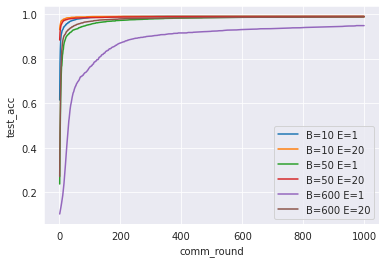

In [139]:
for combination in df_metrics['label'].unique():
    sample_df = df_metrics[(df_metrics['setting'] == "IID") & (df_metrics['label'] == combination)]
    sample_df = make_monotonic(sample_df, "test_acc")
    sample_df = fill_the_gap(sample_df, 1000)

    sns.lineplot(data=sample_df, x='comm_round', y='test_acc', label=combination)
plt.legend(loc='lower right')
plt.show()

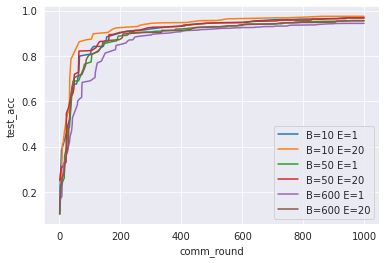

In [140]:
for combination in df_metrics['label'].unique():
    sample_df = df_metrics[(df_metrics['setting'] == "NONIID") & (df_metrics['label'] == combination)]
    sample_df = make_monotonic(sample_df, "test_acc")
    sample_df = fill_the_gap(sample_df, 1000)

    sns.lineplot(data=sample_df, x='comm_round', y='test_acc', label=combination)
plt.legend(loc='lower right')
plt.show()